In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:05<00:00, 142MB/s]
100% 1.06G/1.06G [00:05<00:00, 196MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
def pro(image, lable):
  image = tf.cast(image/255. ,tf.float32)
  return image,lable

train_ds = train_ds.map(pro)
validation_ds = validation_ds.map(pro)

In [19]:
model = Sequential()

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 padding='valid',
                 activation = 'relu',
                 input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'
                       ))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 padding='valid',
                 activation = 'relu',
                 input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'
                       ))

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 padding='valid',
                 activation = 'relu',
                 input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = 2,
                       padding = 'valid'
                       ))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
flag = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.3586 - accuracy: 0.5925 - val_loss: 1.1226 - val_accuracy: 0.5730
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5781 - accuracy: 0.7180 - val_loss: 0.9154 - val_accuracy: 0.5814
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4846 - accuracy: 0.7714 - val_loss: 0.4969 - val_accuracy: 0.7500
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4170 - accuracy: 0.8119 - val_loss: 0.4463 - val_accuracy: 0.7908
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3540 - accuracy: 0.8451 - val_loss: 0.5696 - val_accuracy: 0.6794
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2936 - accuracy: 0.8755 - val_loss: 0.5476 - val_accuracy: 0.7492
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2323 - accuracy: 0.9056 - val_loss: 0.5408 - val_ac

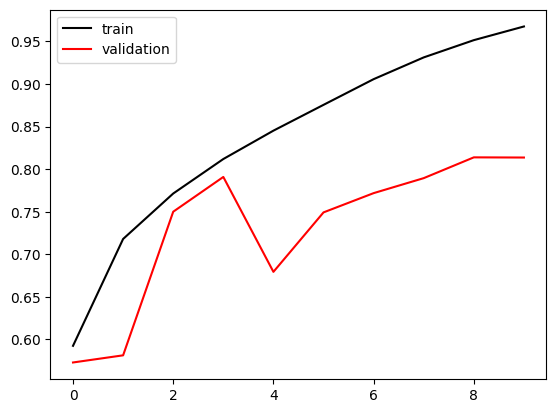

In [27]:
import matplotlib.pyplot as plt

plt.plot(flag.history['accuracy'],color='black',label='train')
plt.plot(flag.history['val_accuracy'],color = 'red', label = 'validation')
plt.legend()
plt.show()

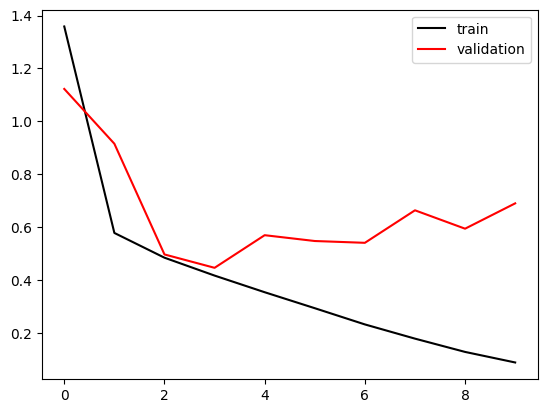

In [30]:
plt.plot(flag.history['loss'],color = 'black', label = 'train')
plt.plot(flag.history['val_loss'],color= 'red', label = 'validation')
plt.legend()
plt.show()

In [56]:
import cv2

In [57]:
testing = cv2.imread('/content/dog.jpg')

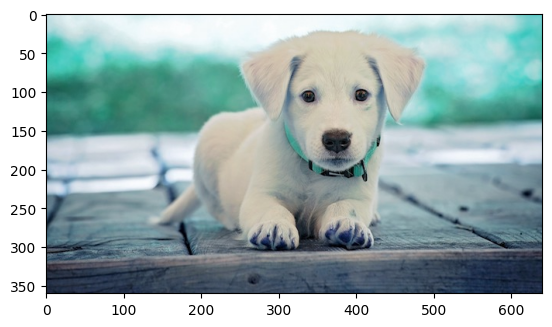

In [58]:
plt.imshow(testing)

In [59]:
testing.shape

(360, 640, 3)

In [60]:
testing = cv2.resize(testing,(256,256))

In [61]:
testing_reshape = testing.reshape(1,256,256,3)

In [62]:
model.predict(testing_reshape) #[0 = cat]  [1 = dog]

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [73]:
testing2 = cv2.imread('/content/cat.jpg')

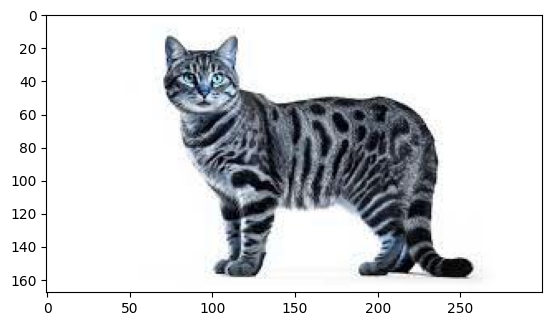

In [74]:
plt.imshow(testing2)

In [75]:
testing2 = cv2.resize(testing2,(256,256))

In [76]:
testing_reshape2 = testing2.reshape(1,256,256,3)

In [77]:
model.predict(testing_reshape2) #[0 = cat]  [1 = dog]

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)